In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<AxesSubplot:>

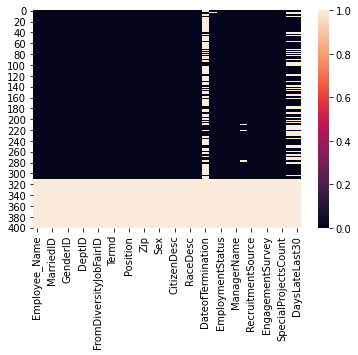

In [3]:
sns.heatmap(df.isnull())

<AxesSubplot:>

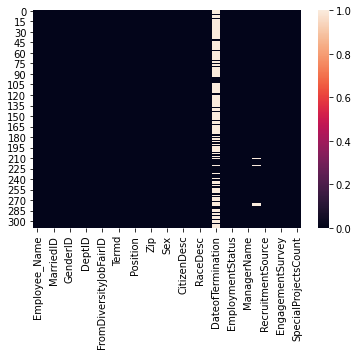

In [4]:
df.drop(['LastPerformanceReview_Date' ,'DaysLateLast30'], axis=1, inplace=True)
df.dropna(thresh=2, inplace=True)

sns.heatmap(df.isnull())

In [5]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%y')

In [6]:
df['DOB'] = df['DOB'].apply(lambda x: x if x.year <= 2019 else dt.date((x.year - 100), x.month, x.day))
df['DOB'].head()

0   1987-11-24
1   1984-04-26
2   1986-09-01
3   1985-09-16
4   1988-05-19
Name: DOB, dtype: datetime64[ns]

### Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [7]:
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [8]:
manager_score = df.pivot_table(values='EmpID', index=df['ManagerName'], 
                               columns=df['PerformanceScore'], 
                               aggfunc='count').fillna(0)

manager_score.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0
Amy Dunn,3.0,15.0,1.0,2.0
Board of Directors,0.0,2.0,0.0,0.0
Brandon R. LeBlanc,0.0,7.0,0.0,0.0
Brannon Miller,7.0,9.0,1.0,4.0


In [9]:
manager_score[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']] = manager_score[
    ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
].apply(lambda x: x / x.sum(), axis=1)

manager_score.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,ex_rate,fm_rate,ni_rate,pip_rate
ManagerName,,,,,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0,0.222222,0.666667,0.111111,0.000000
Amy Dunn,3.0,15.0,1.0,2.0,0.142857,0.714286,0.047619,0.095238
Board of Directors,0.0,2.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000
Brandon R. LeBlanc,0.0,7.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000
Brannon Miller,7.0,9.0,1.0,4.0,0.333333,0.428571,0.047619,0.190476


<AxesSubplot:xlabel='PerformanceScore', ylabel='ManagerName'>

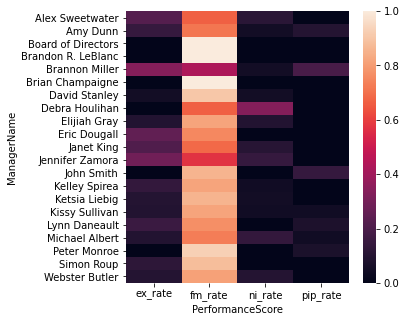

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(manager_score[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']])

In [11]:
manager_score['no_of_subordinates'] = manager_score.apply(
    lambda row: row[['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']].sum(), axis=1
)

manager_score.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,ex_rate,fm_rate,ni_rate,pip_rate,no_of_subordinates
ManagerName,,,,,,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0,0.222222,0.666667,0.111111,0.000000,9.0
Amy Dunn,3.0,15.0,1.0,2.0,0.142857,0.714286,0.047619,0.095238,21.0
Board of Directors,0.0,2.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,2.0
Brandon R. LeBlanc,0.0,7.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,7.0
Brannon Miller,7.0,9.0,1.0,4.0,0.333333,0.428571,0.047619,0.190476,21.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Alex Sweetwater'),
  Text(1, 0, 'Amy Dunn'),
  Text(2, 0, 'Board of Directors'),
  Text(3, 0, 'Brandon R. LeBlanc'),
  Text(4, 0, 'Brannon Miller'),
  Text(5, 0, 'Brian Champaigne'),
  Text(6, 0, 'David Stanley'),
  Text(7, 0, 'Debra Houlihan'),
  Text(8, 0, 'Elijiah Gray'),
  Text(9, 0, 'Eric Dougall'),
  Text(10, 0, 'Janet King'),
  Text(11, 0, 'Jennifer Zamora'),
  Text(12, 0, 'John Smith'),
  Text(13, 0, 'Kelley Spirea'),
  Text(14, 0, 'Ketsia Liebig'),
  Text(15, 0, 'Kissy Sullivan'),
  Text(16, 0, 'Lynn Daneault'),
  Text(17, 0, 'Michael Albert'),
  Text(18, 0, 'Peter Monroe'),
  Text(19, 0, 'Simon Roup'),
  Text(20, 0, 'Webster Butler')])

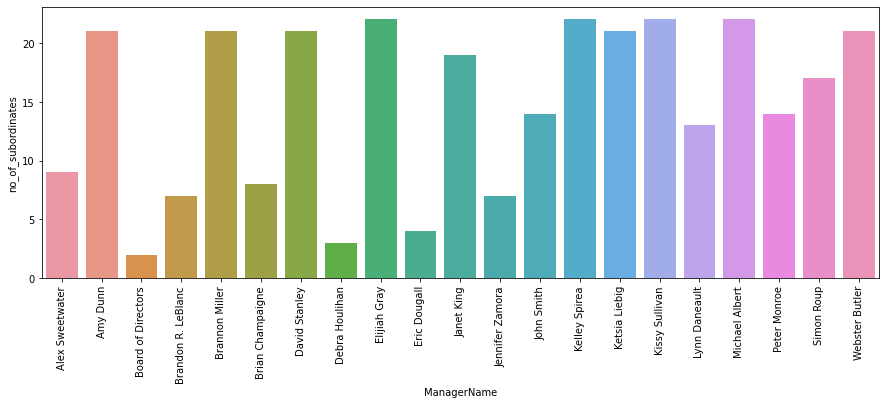

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=manager_score.index, y=manager_score['no_of_subordinates'])

plt.xticks(rotation=90)

In [13]:
big_teams = manager_score[manager_score['no_of_subordinates'] >= 10]
medium_teams = manager_score[
    (manager_score['no_of_subordinates'] < 10) & (manager_score['no_of_subordinates'] >= 5)
]

small_teams = manager_score[manager_score['no_of_subordinates'] < 5]

<AxesSubplot:xlabel='PerformanceScore', ylabel='ManagerName'>

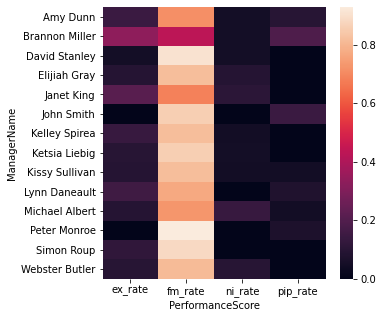

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(big_teams[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']])

<AxesSubplot:xlabel='PerformanceScore', ylabel='ManagerName'>

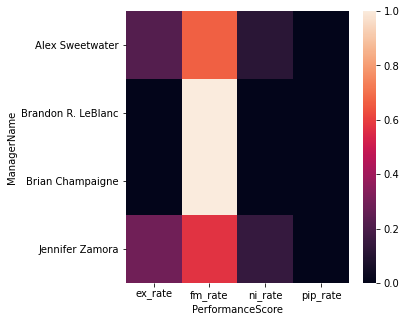

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(medium_teams[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']])

<AxesSubplot:xlabel='PerformanceScore', ylabel='ManagerName'>

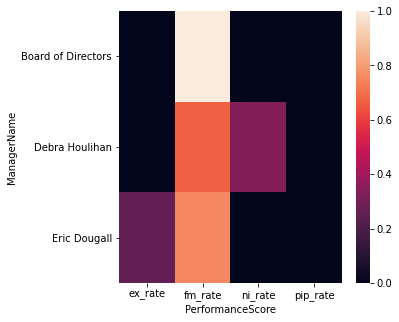

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(small_teams[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']])

In [17]:
big_teams[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']]

PerformanceScore,ex_rate,fm_rate,ni_rate,pip_rate
ManagerName,,,,
Amy Dunn,0.142857,0.714286,0.047619,0.095238
Brannon Miller,0.333333,0.428571,0.047619,0.190476
David Stanley,0.047619,0.904762,0.047619,0.000000
Elijiah Gray,0.090909,0.818182,0.090909,0.000000
Janet King,0.210526,0.684211,0.105263,0.000000
John Smith,0.000000,0.857143,0.000000,0.142857
Kelley Spirea,0.136364,0.818182,0.045455,0.000000
Ketsia Liebig,0.095238,0.857143,0.047619,0.000000
Kissy Sullivan,0.090909,0.818182,0.045455,0.045455


In [18]:
medium_teams[['ex_rate', 'fm_rate', 'ni_rate', 'pip_rate']]

PerformanceScore,ex_rate,fm_rate,ni_rate,pip_rate
ManagerName,,,,
Alex Sweetwater,0.222222,0.666667,0.111111,0.0
Brandon R. LeBlanc,0.000000,1.000000,0.000000,0.0
Brian Champaigne,0.000000,1.000000,0.000000,0.0
Jennifer Zamora,0.285714,0.571429,0.142857,0.0


In [19]:
small_teams['no_of_subordinates']

ManagerName
Board of Directors    2.0
Debra Houlihan        3.0
Eric Dougall          4.0
Name: no_of_subordinates, dtype: float64

### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [20]:
def calc_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)  # according to data description, this is a database last update day
    else:
        end_date = row['DateofTermination']

    return (end_date-row['DateofHire']) / np.timedelta64(1, 'Y')

In [21]:
df['Seniority'] = df.apply(lambda row: calc_seniority(row), axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Diversity Job Fair'),
  Text(1, 0, 'Website Banner Ads'),
  Text(2, 0, 'Internet Search'),
  Text(3, 0, 'Pay Per Click - Google'),
  Text(4, 0, 'Social Networks - Facebook Twitter etc'),
  Text(5, 0, 'Billboard'),
  Text(6, 0, 'Monster.com'),
  Text(7, 0, 'Newspager/Magazine'),
  Text(8, 0, 'Professional Society'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Employee Referral'),
  Text(11, 0, 'Indeed'),
  Text(12, 0, 'Search Engine - Google Bing Yahoo'),
  Text(13, 0, 'Glassdoor'),
  Text(14, 0, 'Vendor Referral'),
  Text(15, 0, 'MBTA ads'),
  Text(16, 0, 'Information Session'),
  Text(17, 0, 'Word of Mouth'),
  Text(18, 0, 'Pay Per Click'),
  Text(19, 0, 'On-campus Recruiting'),
  Text(20, 0, 'On-line Web application'),
  Text(21, 0, 'Careerbuilder'),
  Text(22, 0, 'Company Intranet - Partner')])

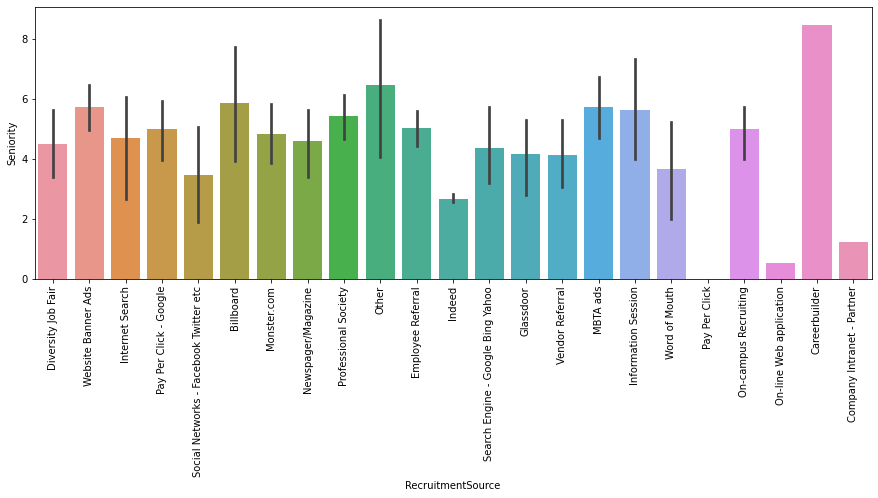

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['RecruitmentSource'], y=df['Seniority'], data=df)

plt.xticks(rotation=90)

In [23]:
df.value_counts('RecruitmentSource')

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word of Mouth                             13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Careerbuilder                              1
On-line Web application                    1
Pay Per Click                        

### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='MaritalDesc'>

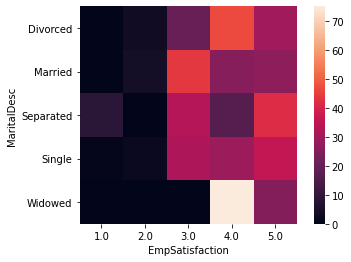

In [24]:
sns.heatmap(
    data=df.pivot_table(
        values='EmpID', index=df['MaritalDesc'], 
        columns=df['EmpSatisfaction'], 
        aggfunc='count'
    ).fillna(0).apply(
        lambda x: (x/x.sum() * 100).round(1), 
        axis=1
    ), square=True
)

### Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [25]:
df['Age'] = df['DOB'].apply(lambda x: (dt.datetime(2019,9,27)-x) / np.timedelta64(1, 'Y'))

In [26]:
df['Age'].describe()

count    310.000000
mean      40.667272
std        8.887366
min       27.110755
25%       33.362081
50%       39.038447
75%       45.822981
max       68.735155
Name: Age, dtype: float64

In [27]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,177.0,40.717024,9.625875,27.275030,32.972614,38.990534,46.506088,68.735155
M,133.0,40.601061,7.832390,27.110755,34.738564,39.086360,45.326051,64.959582


<AxesSubplot:ylabel='Age'>

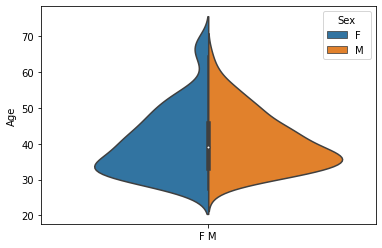

In [28]:
sns.violinplot(x=['F M']*len(df), y='Age', hue='Sex', data=df, split='True')

### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [29]:
bins = [*range(15, 80, 5)]
labels = bins = [*range(15, 75, 5)]
df['AgeBins'] = pd.cut(df['Age'], bins, labels)

df['AgeBins']

0      (30, 35]
1      (35, 40]
2      (30, 35]
3      (30, 35]
4      (30, 35]
         ...   
305    (65, 70]
306    (30, 35]
307    (35, 40]
308    (50, 55]
309    (40, 45]
Name: AgeBins, Length: 310, dtype: category
Categories (11, interval[int64]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

In [30]:
bins

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

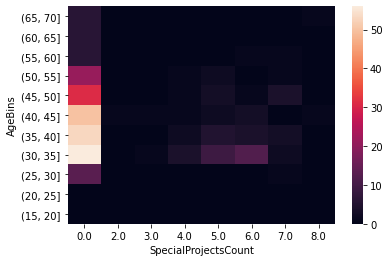

In [31]:
sns.heatmap(
    data=df.pivot_table(
        values='EmpID', index=df['AgeBins'], 
        columns=df['SpecialProjectsCount'], 
        aggfunc='count'
    ).fillna(0)
).invert_yaxis()

## Odpowiedzi
<b>Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?</b><br>
Istnieje generalna przewaga w wydawaniu przez managerów ocen "Fully Meets", co może mieć sens o tyle, że w prawidłowo działającym przedsiębiorstwie większość zatrudnionych spełnia oczekiwania, a tylko nieliczni mają w tym obszarze trudności. U każdego z managerów ocena "Fully Meets" jest wystawiana najczęściej, jednak istnieją wśród nich różnice jeżeli chodzi o rozproszenie na inne wartości ocen. Ponieważ ilość podwładnych poszczególnych managerów jest zróżnicowana, to wzięta jest pod uwagę wielkość zarządzanych zespółów.<br>
W takim ujęciu w dużych zespołach (10 i więcej podwładnych) największe rozproszenie ocen jest u Brannona Millera, u którego jest najniższy odsetek ocen "Fully Meets" (43%), ale jednocześnie najwyższy ocen "Exceeds" (33%) i "PIP" (19%); najmniej zróżnicowane profile ocen są u Davida Stanleya oraz Petera Monroe, u których odsetek ocen "Fully Meets" stanowi odpowiednio 91% i 92%.<br>
W czterech zespołach średnich (od pięciu do dziewięciu podwładnych łącznie) dwóch managerów ocenia wszystkich swoich podwładnych notą "Fully Meets", pozostali dwaj dają oceny bardziej zróżnicowane. W zespołach małych natomiast (ponizej pięciu podwładnych), obydwoje managerów ocenianych przez Zarząd otrzymało ocenę "Fully Meets", pozostali managerowie udzielili bardziej zróżnicowanych ocen podwładnym.<br>

<b>Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?</b><br>
Na podstawie danych trudno jest wskazać źródło pracowników pozostających najdłużej w firmie. Najdłuższy staż ma pracownik ze źródła "Carreerbuilder", ale jest to tylko jedna osoba. Można stwierdzić, że najsłabszy wynik pod tym kątem ma "Indeed", z przeciętnym okresem zatrudnienia poniżej trzech lat, przy czym z tego źródła zatrudnionych jest tylko ośmiu pracowników.<br>

<b>Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?</b><br>
Dane nie wskazują, aby stan cywilny wpływał na przeciętną ocenę zadowolenia z pracy. Widać jedynie tendencję u pracowników owdowiałych do przyznawania wyłącznie ocen najwyższych, tj. 4 i 5, podczas gdy w pozostałych grupach oceny są rozproszone głównie w zakresie 3-4-5.<br>

<b>Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?</b><br>
Średni wiek pracowników to 40,7 lat, najmłodszy ma 27, a najstarszy 68 lat. Nie jest widoczna istotna różnica struktury wieku między kobietami a mężczyznami - średnia wieku jest podobna, natomiast najstarszy mężczyzna ma niecałe 65 lat - wspomnianą 68-letnią osobą jest kobieta.<br>

<b>Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?</b><br>
Rozkład ilości projektów specjalnych jest przesunięty w kierunku młodszych pracowników, ale ma to raczej związek z samym rozkładem wieku pracowników. Nie można natomiast powiedzieć, że istnieje związek między wiekiem pracowników i ilością projektów specjalnych, w jakie są zaangażowani. Rozkład pracowników niezaangażowanych w żaden projekt specjalny również odpowiada rozkładowi wieku pracowników.